## K Nearest Neighbors

This notebook will demonstrate an application of K Nearest Neighbors on the [Diabaties](data/diabetes.csv) dataset.

In [5]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

#importing the dataset as a dataframe
df = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Supervised Learning/6_K_Nearest Neighbors/Data/diabetes.csv")
print(df.info())
# check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Pre- Processing

Before we can KNN, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

First, remove variables with zero variance 

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Class count of the target variable 'Outcome':
Outcome
0    500
1    268
Name: count, dtype: int64


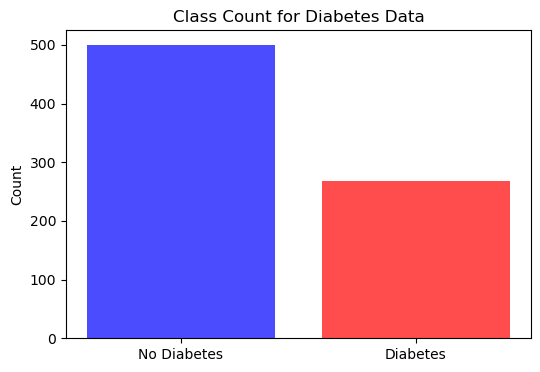

In [8]:
# Get the class counts for the 'Outcome' column
class_counts = df['Outcome'].value_counts()  # Count the number of 0s and 1s

# Print the class count to the console
print("Class count of the target variable 'Outcome':")
print(class_counts)

# Plot a bar chart to visualize the class count
plt.figure(figsize=(6, 4))  # Set figure size for better clarity
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'], alpha=0.7)  # Color coding for bars
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Labeling the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Class Count for Diabetes Data')  # Title of the plot
plt.show()  # Display the plot

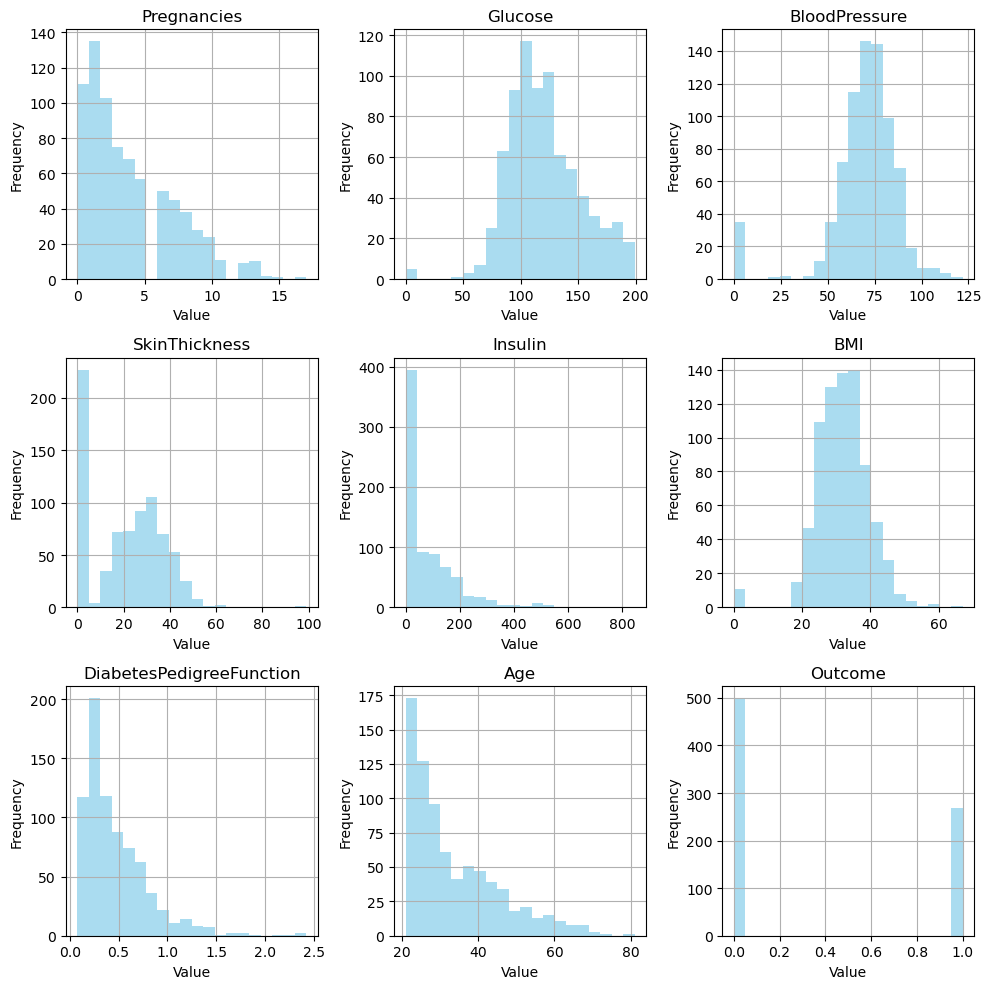

In [10]:
# Create histograms for each column in the DataFrame
# Set the figure size to 10x10 for better visibility
histograms = df.hist(figsize=(10, 10), bins=20, color='skyblue', alpha=0.7)  # Create histograms with more bins

# Optional: Iterate over the axes to customize further (e.g., add labels or titles)
for ax in histograms.flatten():  # Flatten the 2D array of axes to loop over each one
    ax.set_ylabel('Frequency')  # Label for y-axis
    ax.set_xlabel('Value')  # Label for x-axis

# Display the histograms
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Show the histograms

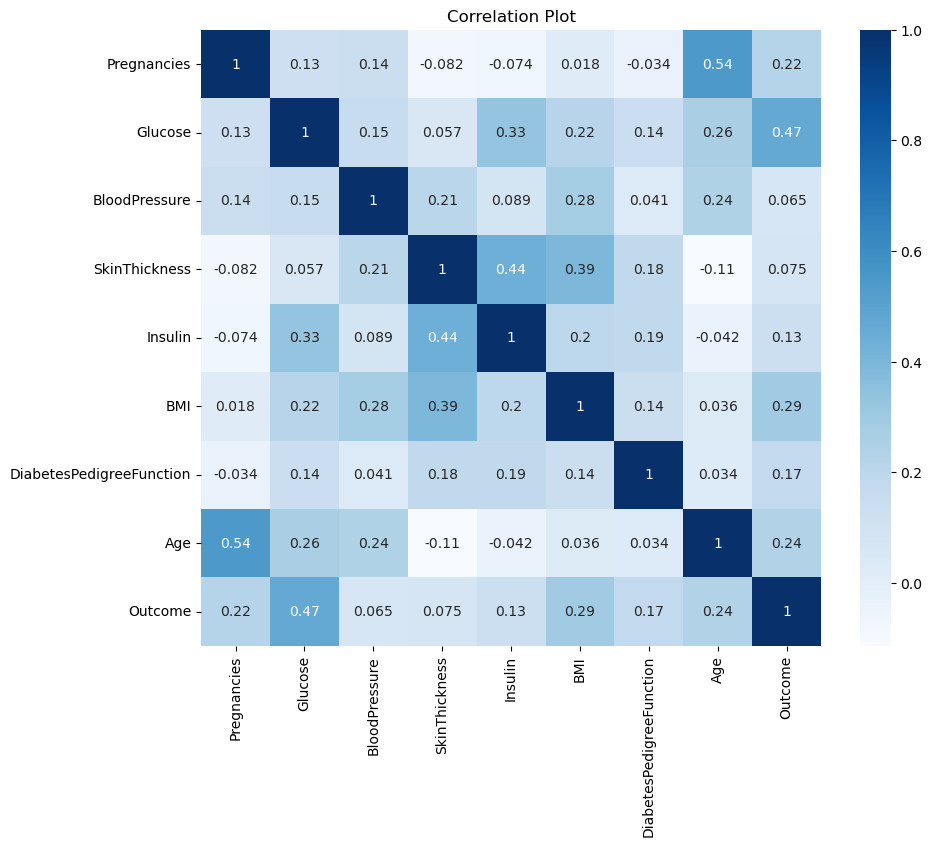

In [11]:
# Visualize correlation plot
plt.figure(figsize=(10,8))  
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues') 
plt.title("Correlation Plot")
plt.show()

In [18]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

#X = diabetes_data.drop("Outcome",axis = 1)
y = df.Outcome
#it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features and the target variable
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome' are features
y = df['Outcome']  # 'Outcome' is the target variable

# Scale the feature data to have zero mean and unit variance
scaler = StandardScaler()  # Initialize the standard scaler
X_scaled = scaler.fit_transform(X)  # Apply scaling to features

# Split the dataset into training and testing sets
# Use 80% for training and 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#Output the shape of training and testing sets to ensure correct splitting
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (614, 8) (614,)
Testing set shape: (154, 8) (154,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# List to store cross-validation scores for different numbers of neighbors
cv_scores = []

# Test K values from 1 to 49 to find the optimal number of neighbors
for k in range(1, 50):  # Loop through potential values of k
    # Create KNN classifier with a specific number of neighbors
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Use distance weighting for neighbors
    # Perform 5-fold cross-validation to assess accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # Store the mean cross-validation score for each k value
    cv_scores.append(scores.mean())

# Find the optimal k value with the highest mean cross-validation score
best_k = np.argmax(cv_scores) + 1  # Indexing starts from 0, so add 1 to get the correct k

# Train the KNN model with the best number of neighbors
knn_optimal = KNeighborsClassifier(n_neighbors=best_k, weights='distance')  # Create KNN with the best k value
knn_optimal.fit(X_train, y_train)  # Train the model with the optimal k

#Print the optimal number of neighbors and the corresponding accuracy score
print("Best number of neighbors:", best_k)
print("Optimal cross-validation accuracy:", cv_scores[best_k - 1])

Best number of neighbors: 33
Optimal cross-validation accuracy: 0.767119818739171


Training accuracy: 1.000
Testing accuracy: 0.760
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



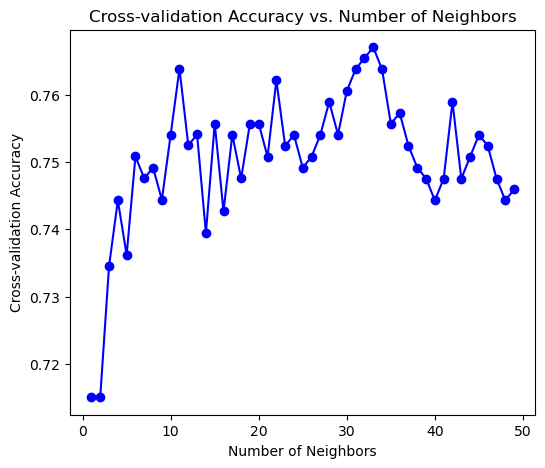

Optimal number of neighbors: 33


In [21]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Evaluate the model's accuracy on the training set
y_train_pred = knn_optimal.predict(X_train)  # Predict training set outcomes
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy

# Evaluate the model's accuracy on the testing set
y_test_pred = knn_optimal.predict(X_test)  # Predict testing set outcomes
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate testing accuracy

# Display the accuracy scores for training and testing sets
print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Testing accuracy: {test_accuracy:.3f}")

# Generate and print the classification report for the testing set
# This includes precision, recall, F1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot the relationship between the number of neighbors and cross-validation accuracy
plt.figure(figsize=(6, 5))  # Set figure size for better visualization
plt.plot(range(1, 50), cv_scores, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.xlabel('Number of Neighbors')  # Label for the x-axis
plt.ylabel('Cross-validation Accuracy')  # Label for the y-axis
plt.title('Cross-validation Accuracy vs. Number of Neighbors')  # Title for the plot
plt.show()  # Display the plot

# Output the optimal number of neighbors
print("Optimal number of neighbors:", best_k)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Accuracy: 0.760
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



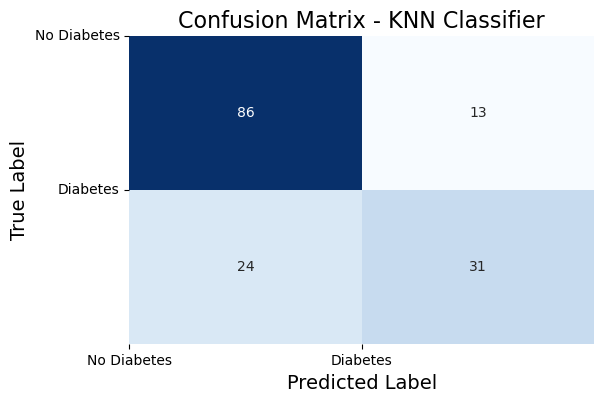

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Number of neighbors to test (1 to 30)
    'weights': ['uniform', 'distance'],  # Weighting strategies for neighbors
    'p': [1, 2, 3, 4, 5],  # Minkowski distance parameter
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # KNN algorithms to try
}

# Create a KNN model
knn = KNeighborsClassifier()  # Default KNN model

# Create a GridSearchCV object with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
best_params = grid_search.best_params_  # Store the best parameters
print("Best Hyperparameters:", best_params)

# Predict on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Display accuracy score and classification report
accuracy = metrics.accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Plot the confusion matrix to visualize prediction performance
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  # Get confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix)  # Convert to DataFrame for easier plotting

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(
    confusion_matrix_df,
    annot=True,  # Display values in the heatmap
    fmt="d",  # Format for integer values
    cmap="Blues",  # Color map
    cbar=False  # Remove color bar
)

# Set axis labels and title for the confusion matrix
plt.xlabel("Predicted Label", fontsize=14)  # Label for x-axis
plt.ylabel("True Label", fontsize=14)  # Label for y-axis
plt.title("Confusion Matrix - KNN Classifier", fontsize=16)  # Title with font size adjustment

# Display the confusion matrix with adjusted tick labels
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"])  # Set x-axis tick labels
plt.yticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"], rotation=0)  # Set y-axis tick labels
plt.show()  # Display the heatmap


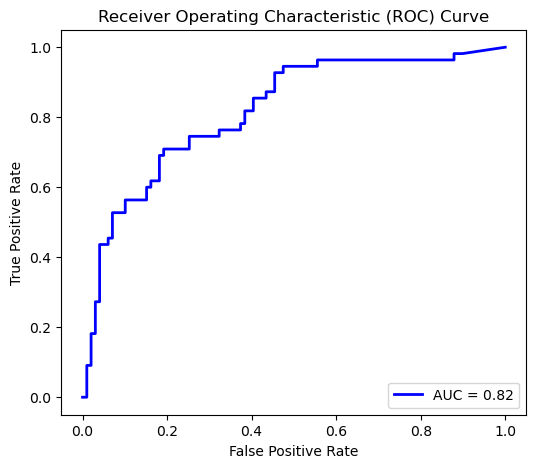

Area Under the Curve (AUC): 0.82


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict class probabilities for the testing set
# We use the probabilities for the positive class (index 1)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate the Area Under the ROC Curve (AUC) to measure the model's discriminatory power
auc = roc_auc_score(y_test, y_prob)  # Calculate AUC based on test set probabilities

# Get the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds to plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 5))  # Set the figure size for the plot
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc:.2f}')  # Plot ROC with a line
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title of the plot
plt.legend(loc='lower right')  # Place the legend in the lower-right corner
plt.show()  # Display the plot

# Print the AUC value to summarize the model's performance
print(f'Area Under the Curve (AUC): {auc:.2f}')


### Regression

In [24]:
#Instantiate the model
knn_model = KNeighborsRegressor(n_neighbors=3)
#Fit the mdoel with data
knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)
print("Training Root Mean Squared Error:", rmse)

Training Root Mean Squared Error: 0.3099858145330628


In [25]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
print('Testing Root Mean Squared Error:', rmse)

Testing Root Mean Squared Error: 0.4550502247782184


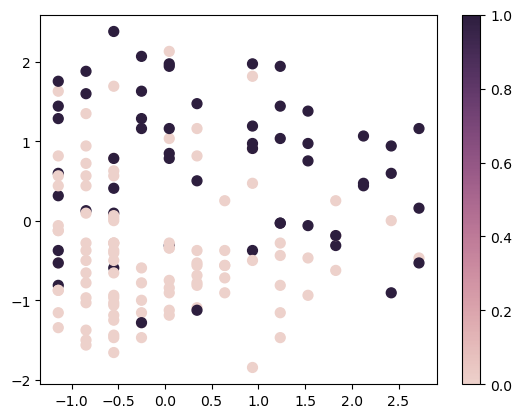

In [26]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()